<a href="https://colab.research.google.com/github/suyangegrong/pdm08/blob/main/project/pdm_prj01_mid_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDM: Project01
- ### data: sklearn이 제공하는 당뇨병 데이터  
- ### analysis:  Keras MLP Regression 


# pandas
## MLP
    * 당뇨병 데이터 MLP 회기 분석 모형

> [참고] https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [2]:
# import
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets

In [3]:
#
# pandas
#
########################################
# 당뇨병 데이터 구조 => DataFrame
# Attribute Information:
#     - age     age in years
#     - sex
#     - bmi     body mass index
#     - bp      average blood pressure
#     - s1      tc, T-Cells (a type of white blood cells)
#     - s2      ldl, low-density lipoproteins
#     - s3      hdl, high-density lipoproteins
#     - s4      tch, thyroid stimulating hormone
#     - s5      ltg, lamotrigine
#     - s6      glu, blood sugar level
# - target  a quantitative measure of disease progression one year after baseline
# [참고] https://wikidocs.net/49981
#       https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes
#
########################################
df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## Check data

In [5]:
# NaN, null
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [6]:
# Duplicates
df.duplicated().sum()

0

## target의 값을 결정하는 중요한 특징
- 양의 상관성: bmi, bp, s5
- 반상관성 : s3

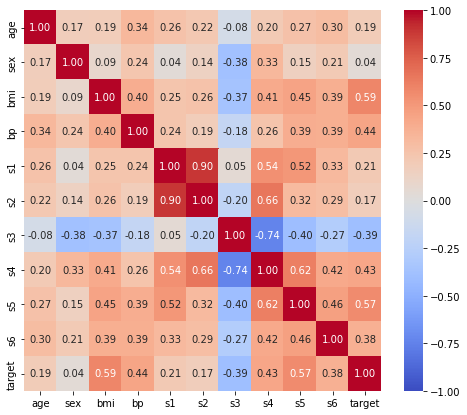

In [7]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()

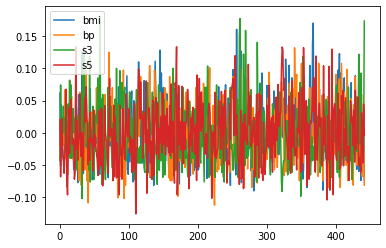

In [8]:
df[['bmi','bp','s3','s5']].plot()

<Figure size 576x576 with 0 Axes>

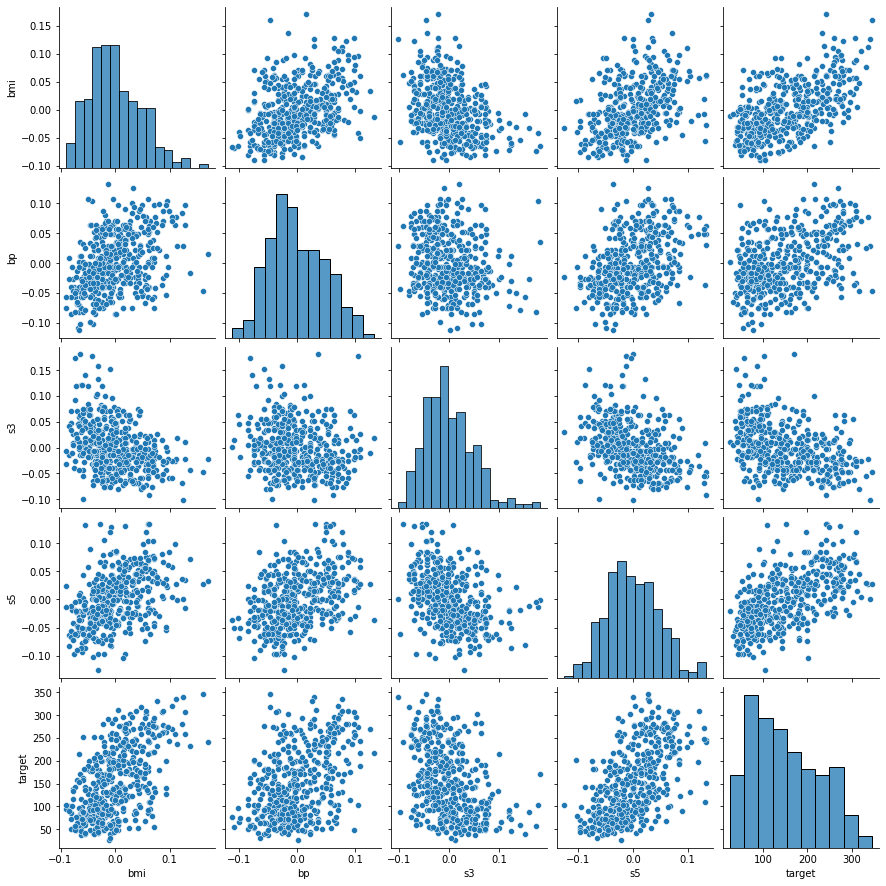

In [9]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi', 'bp', 's3','s5','target']])
plt.show()

---

## 데이터 구성
- train data
- test data


In [10]:
X = df[['bmi', 'bp', 's3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)

((442, 4), (442, 1), numpy.ndarray, numpy.ndarray)

In [11]:
y = np.squeeze(y, 1)
X.shape, y.shape

((442, 4), (442,))

In [12]:
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 4), (89, 4), (353,), (89,))

## MLP model
- Sequential model
- Functional model

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (4,), activation = 'relu')) # 1st hidden layer
model.add(Dense(8, activation = 'relu'))  # 2nd hidden layer
model.add(Dense(1))  #, activation = 'sigmoid'))  # output layer
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

29/29 - 3s - loss: 31503.6836 - mse: 31503.6836 - val_loss: 22445.2129 - val_mse: 22445.2148 - 3s/epoch - 97ms/step
Epoch 2/200
29/29 - 0s - loss: 31452.4004 - mse: 31452.4004 - val_loss: 22395.9785 - val_mse: 22395.9785 - 106ms/epoch - 4ms/step
Epoch 3/200
29/29 - 0s - loss: 31386.1445 - mse: 31386.1445 - val_loss: 22331.7402 - val_mse: 22331.7402 - 101ms/epoch - 3ms/step
Epoch 4/200
29/29 - 0s - loss: 31300.0566 - mse: 31300.0566 - val_loss: 22248.4961 - val_mse: 22248.4961 - 94ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 31191.5176 - mse: 31191.5176 - val_loss: 22151.0176 - val_mse: 22151.0176 - 109ms/epoch - 4ms/step
Epoch 6/200
29/29 - 0s - loss: 31061.2910 - mse: 31061.2910 - val_loss: 22029.5273 - val_mse: 22029.5273 - 92ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 30904.9746 - mse: 30904.9746 - val_loss: 21888.2695 - val_mse: 21888.2695 - 112ms/epoch - 4ms/step
Epoch 8/200
29/29 - 0s - loss: 30719.9922 - mse: 30719.9922 - val_loss: 21721.0098 - val_mse: 21721.0098 -

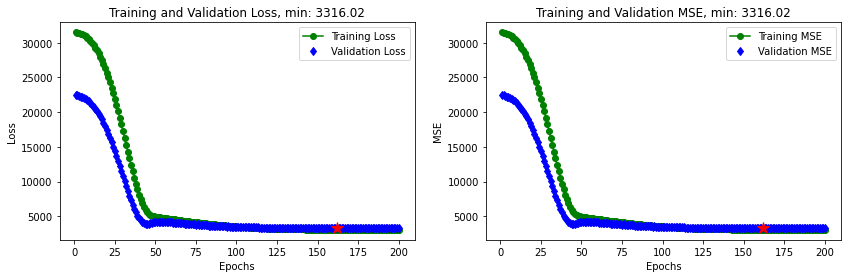

In [16]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [17]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2944.7891 - mse: 2944.7891 - 29ms/epoch - 3ms/step
테스트 세트의 MSE: 2944.79 


In [18]:
y_pred= model.predict(X_test, batch_size=10) 
y_pred

9/9 [==============================] - 0s 2ms/step


array([[154.6108  ],
       [167.33202 ],
       [169.17957 ],
       [276.8956  ],
       [143.04738 ],
       [ 99.401695],
       [263.47113 ],
       [217.66724 ],
       [105.83391 ],
       [133.6523  ],
       [ 99.16665 ],
       [157.49583 ],
       [ 57.133167],
       [218.89996 ],
       [111.608696],
       [135.1001  ],
       [231.50916 ],
       [249.6846  ],
       [193.31496 ],
       [221.7872  ],
       [202.59694 ],
       [ 92.084915],
       [ 57.703876],
       [204.037   ],
       [148.08385 ],
       [172.87955 ],
       [199.2789  ],
       [186.47649 ],
       [ 41.477005],
       [134.13533 ],
       [167.96394 ],
       [ 90.67969 ],
       [150.60172 ],
       [193.52821 ],
       [167.80714 ],
       [218.33566 ],
       [140.58578 ],
       [141.5499  ],
       [161.17097 ],
       [ 53.243755],
       [ 62.271473],
       [114.178696],
       [174.39415 ],
       [158.80496 ],
       [173.38219 ],
       [ 60.963634],
       [ 71.80655 ],
       [ 80.0

In [19]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()


9/9 [==============================] - 0s 2ms/step


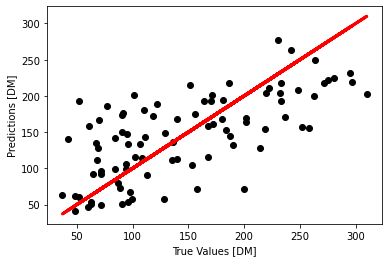

In [20]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [21]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2944.7888826037984
r2_score: 0.44418562880380075


---

### [DIY] MLP Functional model을 구성해서 분석하시오.

Epoch 1/300
29/29 - 1s - loss: 31505.2598 - mse: 31505.2598 - val_loss: 22451.6582 - val_mse: 22451.6582 - 857ms/epoch - 30ms/step
Epoch 2/300
29/29 - 0s - loss: 31457.0098 - mse: 31457.0098 - val_loss: 22409.8945 - val_mse: 22409.8945 - 162ms/epoch - 6ms/step
Epoch 3/300
29/29 - 0s - loss: 31401.3262 - mse: 31401.3262 - val_loss: 22358.1582 - val_mse: 22358.1582 - 215ms/epoch - 7ms/step
Epoch 4/300
29/29 - 0s - loss: 31334.0703 - mse: 31334.0703 - val_loss: 22298.1758 - val_mse: 22298.1758 - 246ms/epoch - 8ms/step
Epoch 5/300
29/29 - 0s - loss: 31255.0957 - mse: 31255.0996 - val_loss: 22228.6562 - val_mse: 22228.6562 - 195ms/epoch - 7ms/step
Epoch 6/300
29/29 - 0s - loss: 31162.2793 - mse: 31162.2793 - val_loss: 22144.1797 - val_mse: 22144.1797 - 118ms/epoch - 4ms/step
Epoch 7/300
29/29 - 0s - loss: 31052.4258 - mse: 31052.4258 - val_loss: 22050.6914 - val_mse: 22050.6914 - 95ms/epoch - 3ms/step
Epoch 8/300
29/29 - 0s - loss: 30930.8555 - mse: 30930.8555 - val_loss: 21943.1152 - val_m

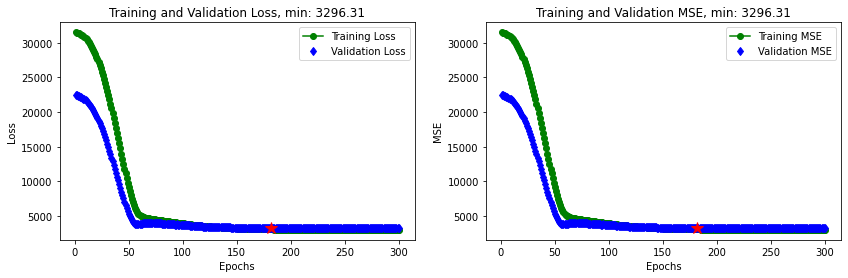

9/9 - 0s - loss: 2945.7478 - mse: 2945.7478 - 30ms/epoch - 3ms/step
테스트 세트의 MSE: 2945.75 
9/9 [==============================] - 0s 2ms/step


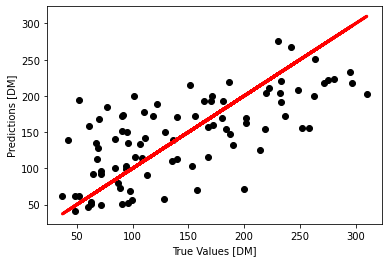

mean_squared_errors: 2945.747805584489
r2_score: 0.4440046368227841


In [34]:
# Functional model

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.models as models
import keras.layers as layers

inputs = layers.Input(shape=(4,))

x = layers.Dense(16, activation='relu')(inputs)
y = layers.Dense(8, activation='relu')(x)
output = layers.Dense(1)(y)

model = models.Model(inputs = inputs, outputs = output)

optimizer = tf.keras.optimizers.RMSprop(0.001)  
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )

history = model.fit(X_train, y_train, 
          epochs= 300, 
          batch_size = 10,
          validation_split = 0.2, 
          verbose=2)

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


#X_train,X_test, y_train, y_test

loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

y_pred= model.predict(X_test, batch_size=10) 
y_pred

y_pred= model.predict(X_test, batch_size=10)

plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
# plt.axis('equal')
# plt.axis('square')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))